<a href="https://colab.research.google.com/github/zoeera/FMML-projects-and-labs/blob/main/Module_2_Lab_4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Appreciating, Interpreting and Visualizing Data
## Lab 4: t-Distributed Stochastic Neighbor Embedding (t-SNE)

---



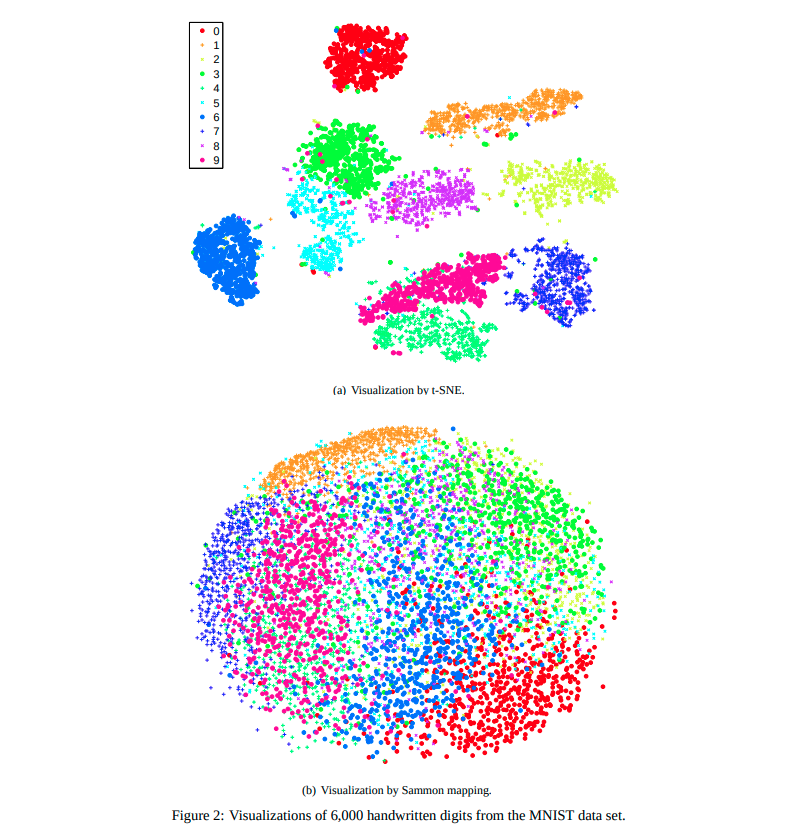

t-SNE's **perplexity** parameter balances local and global data views, typically ranging from 5 to 50. Analyzing multiple plots with different perplexities is recommended. Output may vary due to optimization hyperparameters.

### HOW DOES T-SNE WORK??

3 basic steps of the t-SNE algorithm:

1. **High-dimensional similarities**: Use a Gaussian distribution to measure similarities (Pij) between data points, adjusted by perplexity.
2. **Low-dimensional similarities**: Use a Student t-distribution to measure similarities (Qij) in the low-dimensional space, with heavier tails for far apart distances.
3. **Minimize difference**: Match Qij to Pij using Kullback-Leibler divergence and gradient descent.

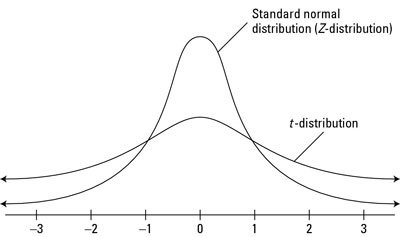

Scikit-learn has an implementation of t-SNE available which provides a wide variety of tuning parameters for t-SNE, and the most notable ones are:

1. n_components (default: 2): Dimension of the embedded space.
2. perplexity (default: 30): The perplexity is related to the number of nearest neighbors that are used in other manifold learning algorithms. Consider selecting a value between 5 and 50.
3. n_iter (default: 1000): Maximum number of iterations for the optimization. Should be at least 250.
4. method (default: ‘barnes_hut’): Barnes-Hut approximation runs in O(NlogN) time. method=’exact’ will run on the slower, but exact, algorithm in O(N^2) time.

In [13]:
# numpy
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# sklearn
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

# Random state
RS = 20240101

# matplotlib
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib

# Enable inline plotting
%matplotlib inline

# seaborn
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('colorblind')
sns.set_context("paper", font_scale=1.2, rc={"lines.linewidth": 1.5})


1797 images each of size 8 x 8 loaded using load_digits()

In [14]:
digits = load_digits()
digits.data.shape

(1797, 64)

Printing some images from the dataset

---



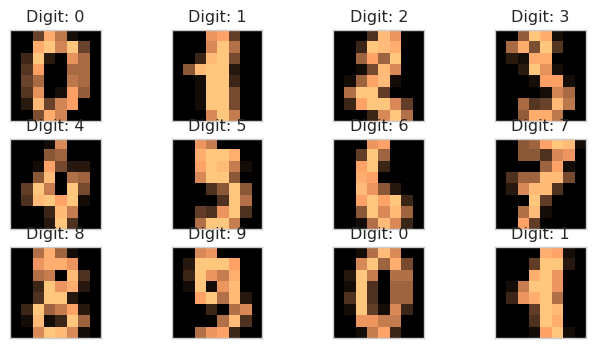

In [15]:
nrows, ncols = 3, 4
plt.figure(figsize=(8, 4))
plt.copper()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([])
    ax.set_title(f'Digit: {digits.target[i]}')


In [16]:
# We first reorder the data points according to the handwritten numbers.
X = np.vstack([digits.data[digits.target==i]
               for i in range(10)])
y = np.hstack([digits.target[digits.target==i]
               for i in range(10)])

## Now using TSNE to fit the dataset with the default values.


1. n_components : 2
2. perplexity : 30
3. n_iter : 1000
4. method : ‘barnes_hut’


---



In [17]:
digits_proj = TSNE(init="pca", random_state=RS).fit_transform(X)

#### Visualizing the data in the projected space

---



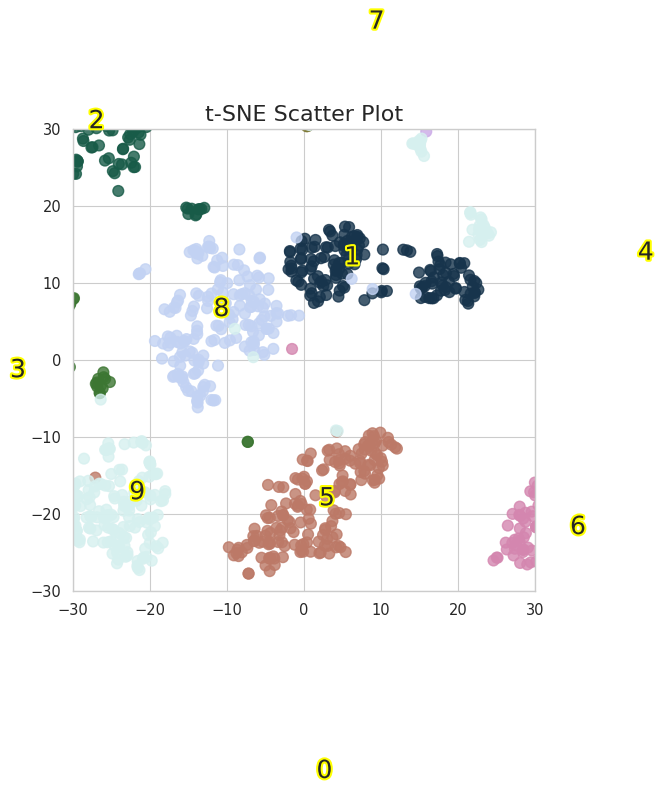

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 't-SNE Scatter Plot'}>,
 <matplotlib.collections.PathCollection at 0x7bfe50ccc2b0>)

In [18]:
def scatter(x, colors):

    palette = np.array(sns.color_palette("cubehelix", 10))

    f = plt.figure(figsize=(10, 6))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:, 0], x[:, 1], lw=1, s=60,
                    c=palette[colors.astype(int)], alpha=0.8)
    plt.xlim(-30, 30)
    plt.ylim(-30, 30)
    ax.axis('on')
    ax.set_title('t-SNE Scatter Plot', fontsize=16)
    txts = []
    for i in range(10):

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=18)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=3, foreground="yellow"),
            PathEffects.Normal()])
        txts.append(txt)
    plt.show()

    return f, ax, sc

scatter(digits_proj, y)


# Tweaking some of the hyperparameters to better understand their role

---

### Changing the PERPLEXITY values


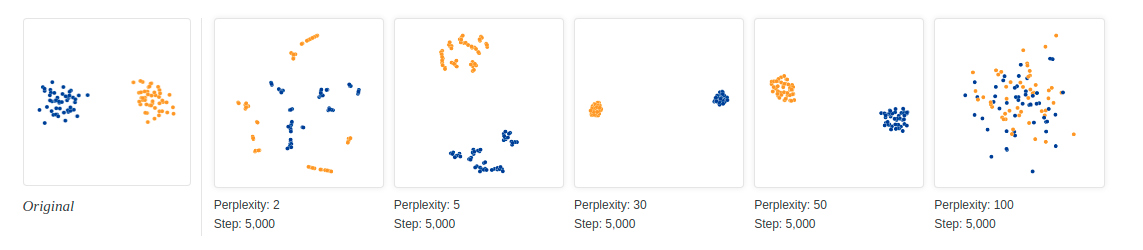



---


1. n_components : 2
2. perplexity : **5**
3. n_iter : 1000
4. method : ‘barnes_hut’


---

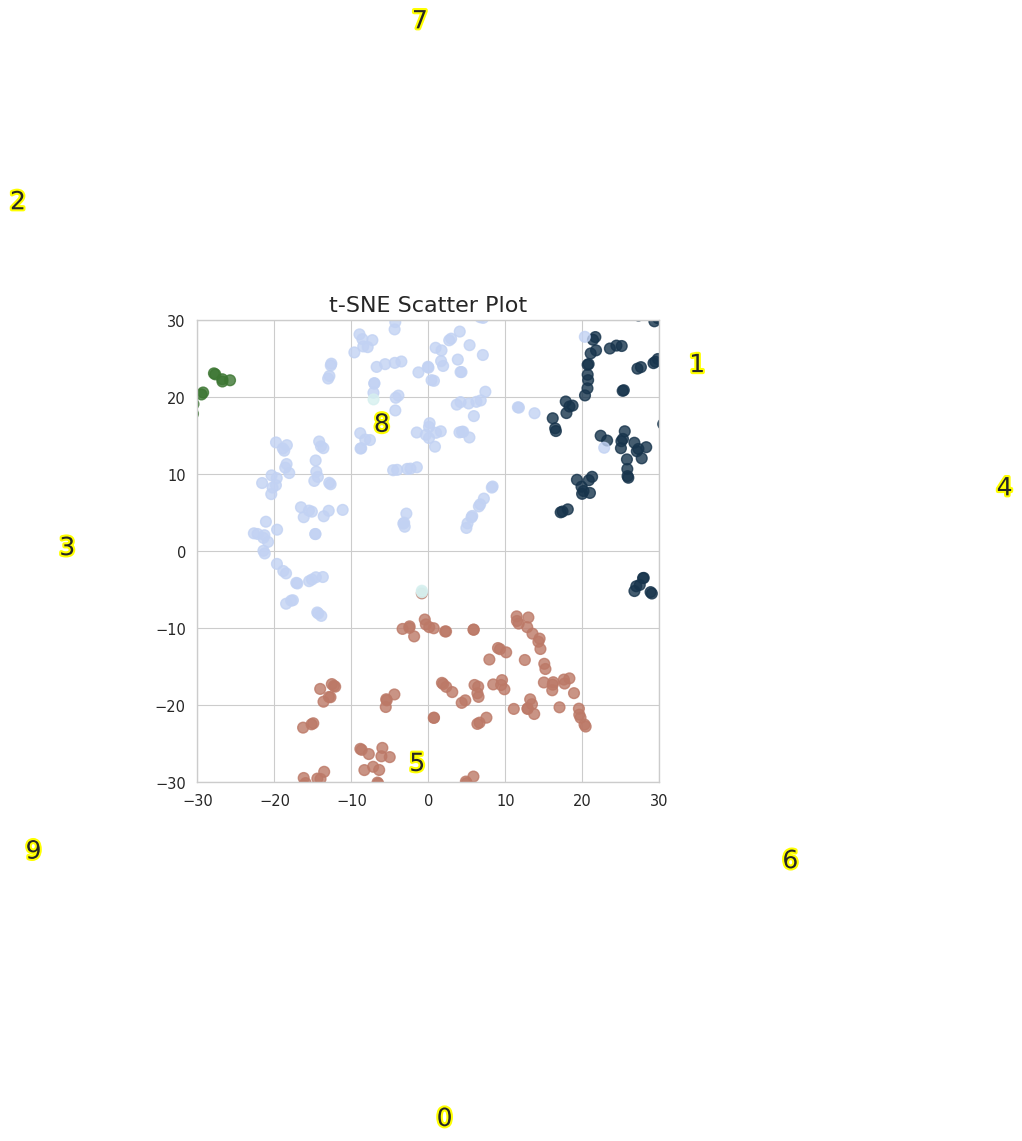

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 't-SNE Scatter Plot'}>,
 <matplotlib.collections.PathCollection at 0x7bfe50ccc3d0>)

In [19]:
digits_proj = TSNE(init="pca", random_state=RS, perplexity=5).fit_transform(X)

scatter(digits_proj, y)

We can see that there are local clusters within the same number group as well. This is happening as the perplexity being at 5, allows the local neighbourhood to dominate. Let us now see what happens if we increase the perplexity to 100, thereby increasing global impact.





---


1. n_components : 2
2. perplexity : **100**
3. n_iter : 1000
4. method : ‘barnes_hut’


---

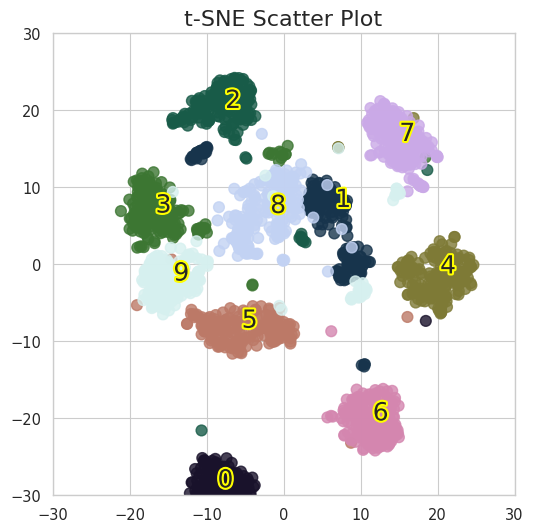

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 't-SNE Scatter Plot'}>,
 <matplotlib.collections.PathCollection at 0x7bfe50bc5270>)

In [20]:
digits_proj = TSNE(init="pca", random_state=RS, perplexity=100).fit_transform(X)

scatter(digits_proj, y)

The general structure of the plot remained similar to the one with perplexity = 30 (default), but on careful observation you can observe many data points not being part of the group they are supposed to be in. This is because of the large number of points considered for the neighbourhood (as perplexity value = 100 is higher), thereby allowing 2 data points from different groups to end up closer.



---

### Changing the NUMBER OF ITERATIONS

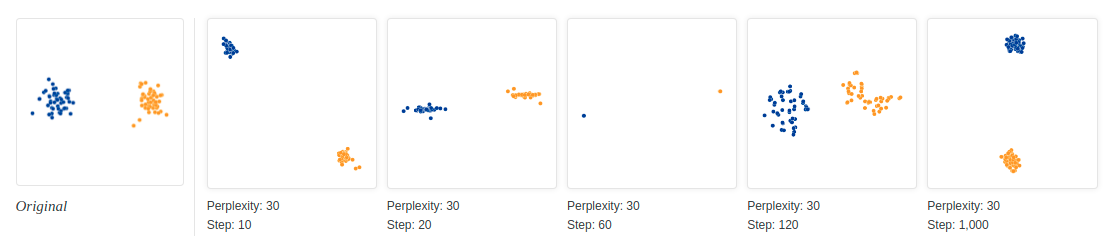

The images above show five different runs at perplexity 30. The first four were stopped before stability. After 10, 20, 60, and 120 steps you can see layouts with seeming 1-dimensional and even pointlike images of the clusters. If you see a t-SNE plot with strange “pinched” shapes, chances are the process was stopped too early. Unfortunately, there’s no fixed number of steps that yields a stable result. Different data sets can require different numbers of iterations to converge.

The most important thing is to iterate until reaching a stable configuration.





---


1. n_components : 2
2. perplexity : 30
3. n_iter : **250**
4. method : ‘barnes_hut’


---

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


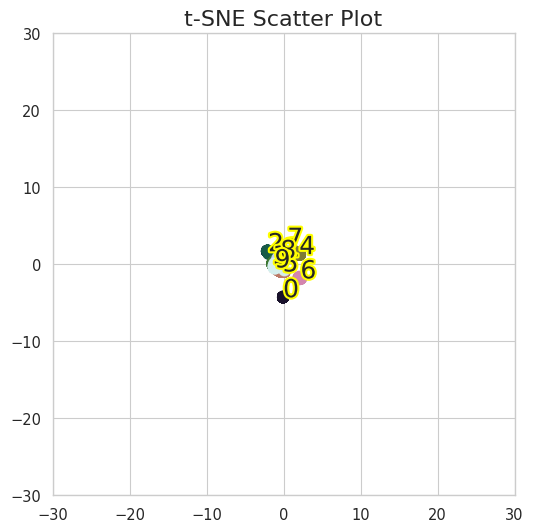

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 't-SNE Scatter Plot'}>,
 <matplotlib.collections.PathCollection at 0x7bfe5503e440>)

In [21]:
digits_proj = TSNE(init="pca", random_state=RS, n_iter=250).fit_transform(X)

scatter(digits_proj, y)

As can be seen from the figure above, stopping the optimization earlier (in 250 iterations) resulted in a suboptimal clustering of the groups.

Let us now see how the results are affected if t-SNE is run for larger number of iterations


---


1. n_components : 2
2. perplexity : 30
3. n_iter : **5000**
4. method : ‘barnes_hut’


---

In [ ]:
digits_proj = TSNE(init="pca", random_state=RS, n_iter=5000).fit_transform(X)

scatter(digits_proj, y)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Running for larger number of iterations more or less resulted in the same plot as the optimization had nearly converged till the default 1000 iterations. However the density of the clusters has increased.

---

### Changing the method to EXACT

The barnes-hut method takes O(NlogN) time, whereas the exact method takes O(N^2) time. Notice the increase in the execution time while running the cell below.


---

1. n_components : 2
2. perplexity : 30
3. n_iter : 1000
4. method : **‘exact’**


---

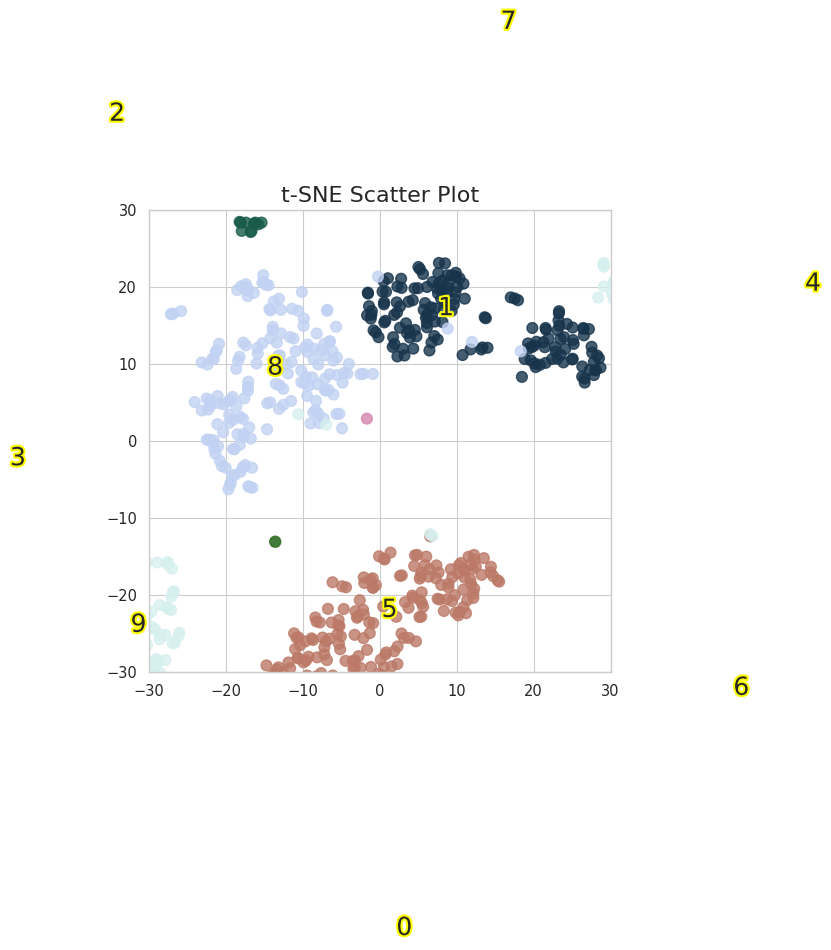

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 't-SNE Scatter Plot'}>,
 <matplotlib.collections.PathCollection at 0x7bfe593597e0>)

In [11]:
digits_proj = TSNE(init="pca", random_state=RS, method='exact').fit_transform(X)

scatter(digits_proj, y)

## EXERCISE

---



Try out different perplexity and iteration values to better appreciate the concepts taught.

You can modify the code in the cell below to check the resultant plots.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


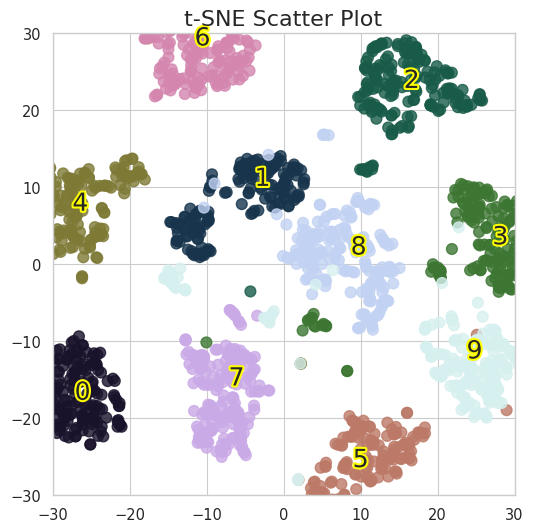

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 't-SNE Scatter Plot'}>,
 <matplotlib.collections.PathCollection at 0x7bfe5110fe50>)

In [12]:
###############################################################
###### MODIFY THE VALUES FOR THE HYPERPARAMETERS BELOW ########

perplexity_value = 30
number_iterations = 500
method = "exact"

###############################################################

digits_proj = TSNE(init="random", random_state=42, n_iter=number_iterations, perplexity=perplexity_value, method=method).fit_transform(X)
scatter(digits_proj, y)




---

## Exercise:

1. Now that you understand t-SNE a bit better, can you point out some differences between PCA and t-SNE. What are the advantages/disadvantages of one over the other?


>##### Pointers:

> a. Which of the two algorithms is linear and which one is non-linear?    
b. How does the non-linearity in one of these two algorithms help in capturing certain data sets?    
c. PCA is known to keep points which were further apart in the higher dimension, far apart in the lower dimension as well. Does t-SNE do the same? Or does it try to preserve local neighbourhood?    
d. Can you comment on which one of the two is computationally more expensive?

a. Linearity:

PCA: Linear dimensionality reduction.

t-SNE: Non-linear dimensionality reduction.

b. Non-linearity Benefits:

t-SNE's non-linearity helps capture complex, non-linear relationships in the data, making it better for visualizing clusters and structures that aren't apparent in linear methods like PCA.

c. Distance Preservation:

PCA: Maintains global structure, keeping points far apart in high dimensions also far apart in low dimensions.

t-SNE: Preserves local neighborhoods, focusing on maintaining local similarity rather than global structure.

d. Computational Expense:

PCA: Less computationally intensive and faster, suitable for large datasets.

t-SNE: More computationally expensive and slower, especially with large datasets due to its iterative optimization process.

2. How does the computational complexity and runtime of t-SNE scale with dataset size and dimensionality?

t-SNE Complexity and Runtime
Dataset Size:

Complexity:
𝑂
(
𝑁
2
)
 (original) or
𝑂
(
𝑁
log
⁡
𝑁
)
 (Barnes-Hut).

Runtime: Increases quadratically with size.

Dimensionality:

Complexity: Depends on dimensions, but less impactful than dataset size.

Runtime: Slower with more features.

Mitigation:

Barnes-Hut t-SNE reduces complexity.

Multicore t-SNE speeds up computation.

Preprocess with PCA to reduce dimensions.

3. What are some limitations or potential pitfalls to be aware of when using t-SNE? (tell atleast 3)

Computationally Intensive: Slow for large datasets due to high complexity.

Output Variability: Results can differ between runs.

Lack of Interpretability: Dimensions are non-linear and hard to interpret.


